In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

# Scatter Plot

In [2]:
# read data and extract height and weight
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

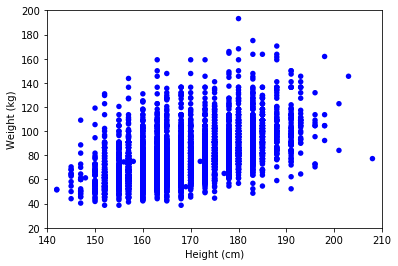

In [3]:
thinkplot.Scatter(heights, weights, alpha=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The scatter plot above shows that the height is indeed related to weight.
Although, the above plot is not correct, because height data was rounded to the nearest inch, packing the info into columns ( as seen in the plot).

In [4]:
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)

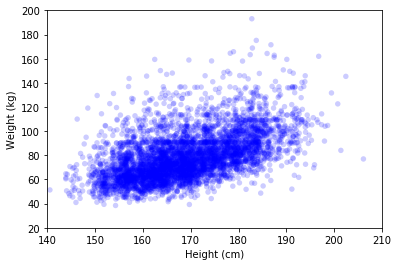

In [5]:
thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

We can see in the plot above the result of applying Jitter method to the data, it created a more realistic data visualization.
By setting alpha to 0.2, we can fix saturation problems. Using this specification, overlaping data points look darker, and we can see where data points are packed. U

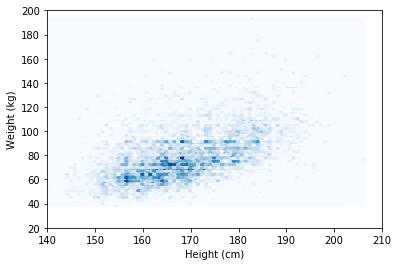

In [6]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In [7]:
# drop rows with nan
df = df.dropna(subset=['htm3', 'wtkg2'])

#makes a numpy array of bins from 135 to 210 (not inclusive), in increments of 5
bins = np.arange(135, 210, 5)

#compute the index of the bin that contains each value
indices = np.digitize(df.htm3, bins)

# group by indices
groups = df.groupby(indices)

In [8]:
# compute the mean and height and CDF of weight for each group
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

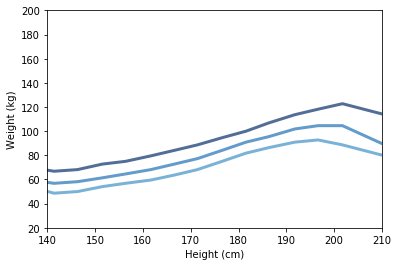

In [9]:
#plot percentiles of weight versus height
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

# Covariance

In [10]:
def Cov(xs, ys, meanx=None, meany=None):
    ''' Computes deviations from the sample means, or you can provide known means'''
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# Correlation

In [11]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [12]:
# define height weight for BRFSS data
cleaned = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = cleaned.htm3, cleaned.wtkg2
# calculate height and weight Pearson's correlation
Corr(heights, weights)

0.5087364789734764

In [13]:
#Spearman's function
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [14]:
#calculate Spearman's correlation between height and weight
SpearmanCorr(heights, weights)

0.5405846262320476

# Exercises

In [17]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1].dropna(subset=['agepreg', 'totalwgt_lb'])

In [18]:
baby_weight = live.totalwgt_lb
mother_age = live.agepreg

In [40]:
#make a scatter plot to visualize the correlation between variables
thinkplot.Scatter(baby_weight, mother_age, alpha=0.1, s=10)
thinkplot.Config(xlabel='baby weight (lb)',
                ylabel='mother age (years)')
# thinkplot.Save(root='7-scatter', formats=['png'])

Writing 7-scatter.png


In [22]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [25]:
# Compute Pearson's Correlation
pearson = Corr(baby_weight, mother_age)
pearson

0.0688339703541091

In [ ]:
import pandas as pd
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [27]:
# Compute Spearman's correlation
spearman = SpearmanCorr(baby_weight, mother_age)
spearman

0.09461004109658226